<a href="https://colab.research.google.com/github/Erick88santos/mineracao-dados/blob/main/erick_Talles_CusterizacaoDesempenhoAutomovel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset**

##Atividade de Mineração de dados

#####**Alunos:** 
Erick P de A Alves dos Santos

Talles Aragão


Informações [ Automotivo de Ward de 1985](https://archive.ics.uci.edu/ml/datasets/automobile).



##**Fonte:**
Criador/Doador:

Jeffrey C. Schlimmer ( Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu )

Fontes:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, Nova York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037






#**Informações do conjunto de dados:**
Esse conjunto de dados consiste em três tipos de entidades: (a) a especificação de um automóvel em termos de várias características, (b) sua classificação de risco de seguro atribuída, (c) suas perdas normalizadas em uso em comparação com outros carros. A segunda classificação corresponde ao grau em que o automóvel é mais arriscado do que seu preço indica. Os carros recebem inicialmente um símbolo de fator de risco associado ao seu preço. Então, se for mais arriscado (ou menos), esse símbolo é ajustado movendo-o para cima (ou para baixo) na escala. Os atuários chamam esse processo de "simbolização". Um valor de +3 indica que o automóvel é arriscado, -3 que provavelmente é bastante seguro.

O terceiro fator é o pagamento de perda média relativa por ano de veículo segurado. Este valor é normalizado para todos os automóveis dentro de uma determinada classificação de tamanho (pequenos de duas portas, carrinhas, desportivos/especialidades, etc...), e representa a perda média por automóvel por ano.

Nota: Vários dos atributos no banco de dados podem ser usados ​​como um atributo de "classe".



#**Informações do atributo:**

Atributo: Faixa de Atributos

1. simbologia: -3, -2, -1, 0, 1, 2, 3.
2. Perdas normalizadas: contínuas de 65 a 256.
3. Marca:
alfa-romero, audi, bmw, chevrolet , dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercúrio,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. tipo de combustível: diesel, gás.
5. aspiração: std, turbo.
6. número de portas: quatro, duas.
7. carroceria: capota rígida, perua, sedã, hatchback, conversível.
8. rodas motrizes: 4wd, fwd, rwd.
9. localização do motor: dianteira, traseira.
10. distância entre eixos: contínua de 86,6 a 120,9.
11. comprimento: contínuo de 141,1 a 208,1.
12. largura: contínua de 60,3 a 72,3.
13. altura: contínua de 47,8 a 59,8.
14. potência de frenagem: de 1488 a 4066.
15. tipo de motor: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. número de cilindros: oito, cinco, quatro, seis, três, doze, dois.
17. tamanho do motor: contínuo de 61 a 326.
18. sistema de combustível: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. furo: contínuo de 2,54 a 3,94.
20. curso: contínuo de 2,07 a 4,17.
21. taxa de compressão: contínua de 7 a 23.
22. cavalos de potência: contínua de 48 a 288.
23. pico-rpm: contínua de 4150 a 6600.
24. cidade-mpg: contínua de 13 a 49.
25. rodovia- mpg: contínuo de 16 a 54.
26. preço: contínuo de 5118 a 45400.



In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from sklearn.metrics import adjusted_rand_score

%matplotlib inline

from google.colab import data_table


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')

df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#**Pré-Processamento**

In [ ]:
data_table.enable_dataframe_formatter()
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
df = df.drop(columns=['?','alfa-romero','rwd','21','two','5000','convertible','rwd','front','88.60','168.80','64.10','48.80','3','dohc','four','mpfi','3.47','2.68','9.00','111','21','27','13495','std','gas'],  axis = 1)
df

,2548,130
0,2548,130
1,2823,152
2,2337,109
3,2824,136
4,2507,136
...,...,...
199,2952,141
200,3049,141
201,3012,173
202,3217,145


In [ ]:
df.rename(columns={'2548': 'POTÊNCIA_DA_FRENAGEM', '130' : 'TAM_MOTOR'}, inplace=True)
df.head()

,POTÊNCIA_DA_FRENAGEM,TAM_MOTOR
0,2548,130
1,2823,152
2,2337,109
3,2824,136
4,2507,136


In [ ]:
X = df
y = df.TAM_MOTOR

#**GRÁFICO DO COTOVELO**

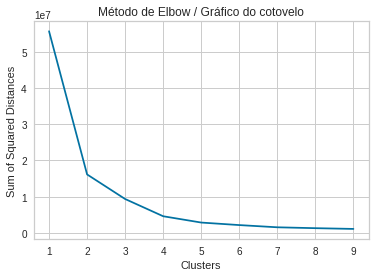

In [ ]:
clusters = range(1,10)
sum_of_squared_distances = []

for k in clusters:
  model = KMeans(n_clusters=k).fit(X)
  sum_of_squared_distances.append(model.inertia_)

plt.plot(clusters, sum_of_squared_distances, "x-")
plt.xlabel("Clusters")
plt.ylabel("Sum of Squared Distances")
plt.title("Método de Elbow / Gráfico do cotovelo")
plt.show()

In [ ]:
for cluster, wcss in enumerate(sum_of_squared_distances):
    print(f'{cluster+1} - {wcss}')

1 - 55659698.46568626
2 - 16135717.518217407
3 - 9352074.577656658
4 - 4594688.578978085
5 - 2854201.5870484663
6 - 2157797.5431000534
7 - 1545733.1802049936
8 - 1302212.7366713185
9 - 1097533.32213962


<function matplotlib.pyplot.tight_layout>

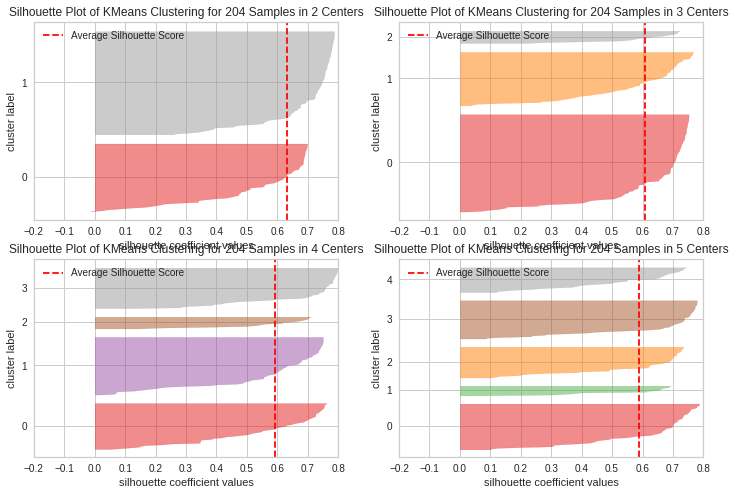

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.reshape(4)

for i, k in enumerate(range(2,6)):
  ax = axes[i]
  sil = SilhouetteVisualizer(
      KMeans(n_clusters=k, random_state=42),
      ax=ax,
        )
  sil.fit(X)
  sil.finalize()
  ax.set_xlim(-0.2, 0.8)

plt.tight_layout

In [ ]:
df_kmeans = KMeans(n_clusters=4)

In [ ]:
df_kmeans.fit(X)

KMeans(n_clusters=4)

In [ ]:
labels = df_kmeans.predict(X)
print(labels)

[1 2 1 2 1 2 2 2 2 1 1 2 2 2 2 0 0 3 3 3 3 3 3 3 3 3 1 1 2 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 3 3 2 0 0 0 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0
 2 3 3 3 3 1 1 2 2 2 1 1 1 1 3 3 3 3 3 3 3 3 3 3 1 1 2 2 2 2 2 2 2 2 2 0 2
 2 2 0 2 2 2 3 3 3 3 1 1 2 2 2 2 2 0 1 1 1 2 2 2 2 2 3 3 1 3 1 1 1 1 1 1 1
 1 3 3 3 1 1 2 3 3 1 1 3 3 3 3 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
centroids = df_kmeans.cluster_centers_
centroids


array([[3676.125     ,  223.6875    ],
       [2389.13333333,  112.32      ],
       [2978.46666667,  148.88333333],
       [1974.18867925,   93.39622642]])

In [ ]:
s = metrics.silhouette_score(X,labels, metric="euclidean")
print(f"Silhouette Coefficient for the Dataset Clusters: {s:.2f}")

Silhouette Coefficient for the Dataset Clusters: 0.59


In [ ]:
X = df

#**Treinamento do k-means**

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)  

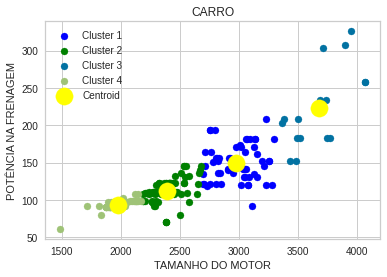

In [ ]:
from IPython.core.pylabtools import figsize
#visulaizing the clusters  
plt.scatter(X[y_predict == 0]['POTÊNCIA_DA_FRENAGEM'], X[y_predict == 0]['TAM_MOTOR'],  c = 'blue', label = 'Cluster 1')   
plt.scatter(X[y_predict == 1]['POTÊNCIA_DA_FRENAGEM'], X[y_predict == 1]['TAM_MOTOR'],  c = 'green', label = 'Cluster 2')   
plt.scatter(X[y_predict == 2]['POTÊNCIA_DA_FRENAGEM'], X[y_predict == 2]['TAM_MOTOR'],  label = 'Cluster 3') 
plt.scatter(X[y_predict == 3]['POTÊNCIA_DA_FRENAGEM'], X[y_predict == 3]['TAM_MOTOR'],  label = 'Cluster 4')
 



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   

plt.title('CARRO')  
plt.xlabel('TAMANHO DO MOTOR')  
plt.ylabel('POTÊNCIA NA FRENAGEM')  
plt.legend()  
plt.show()



#**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

#**Aqui foi decidido colocar a quantidade mínimas de pontos como 3 para ser considerado cluster, pois os pontos da gente eram muito distantes um do outro.**

In [ ]:
df_dbscan = DBSCAN(eps=0.5, min_samples=3)

In [ ]:
df_dbscan.fit(X)

DBSCAN(min_samples=3)

In [ ]:
labels = df_dbscan.labels_

In [ ]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  3,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
set(labels)

{-1, 0, 1, 2, 3}

In [ ]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
core_samples_mask[df_dbscan.core_sample_indices_] = True
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [ ]:
print(f"Número estimado de clusters : {n_clusters}")
print(f"Número estmiado de outliers: {n_noise}")

Número estimado de clusters : 4
Número estmiado de outliers: 191


In [ ]:
s = metrics.silhouette_score(X, df_dbscan.labels_)

In [ ]:
print(f"Coeficiente de Silhouette for the Dataset Clusters: {s:.2f}")

Coeficiente de Silhouette for the Dataset Clusters: -0.41


#**A partir desse ponto não conseguimos prosseguir por conta do erro de coluna, as colunas não estão sendo identificadas.**

In [ ]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
  if k == 1:
    col = "k"

  class_member_mask = (labels == k)
  xy = X[class_member_mask & core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,
  markeredgecolor="k", markersize='0')
  xy = X[class_member_mask & -core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,
  markeredgecolor="k", markersize=5)
plt.title("Número estimados de Clusters: %d" % n_clusters)
plt.show()

TypeError: ignored